In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

In [2]:
sales_train=pd.read_csv('/Users/virajkothari/Desktop/CS4662/data/sales_train.csv')

In [3]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
sum=sales_train.groupby(["date_block_num"],as_index=False)["item_cnt_day"].sum()
sum.set_index('date_block_num')

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0
5,125381.0
6,116966.0
7,125291.0
8,133332.0


In [5]:
ts=sum['item_cnt_day']
ts.head()

0    131479.0
1    128090.0
2    147142.0
3    107190.0
4    106970.0
Name: item_cnt_day, dtype: float64

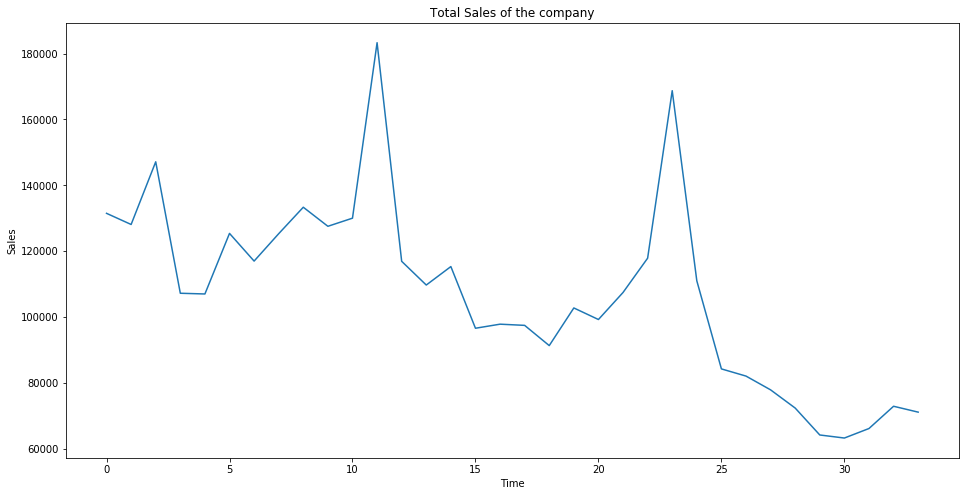

In [6]:
# the total sales per month

%matplotlib inline
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

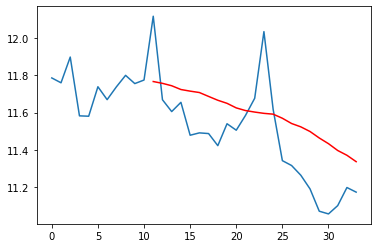

In [7]:
new_ts_log = np.log(ts)
moving_avg = new_ts_log.rolling(window=12,center=False).mean()
plt.plot(new_ts_log)
plt.plot(moving_avg, color='red')

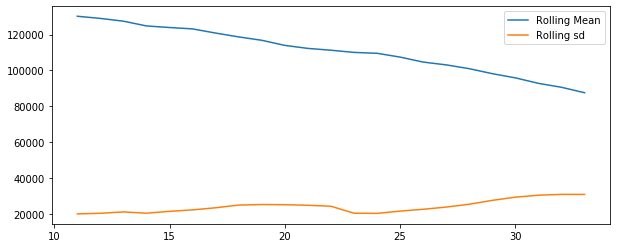

In [8]:
plt.figure(figsize=(10,4))
# print(ts.rolling(window=12,center=False).mean())
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend()

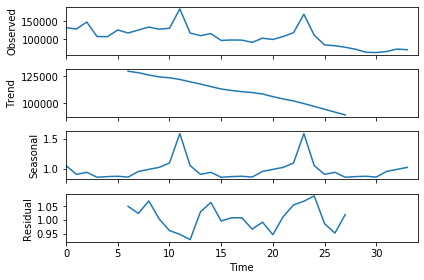

In [9]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()


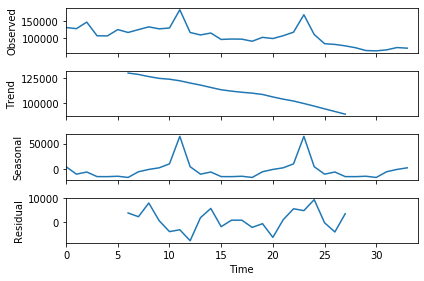

In [10]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()


In [11]:
# Stationarity tests
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [12]:
# to remove trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

[]

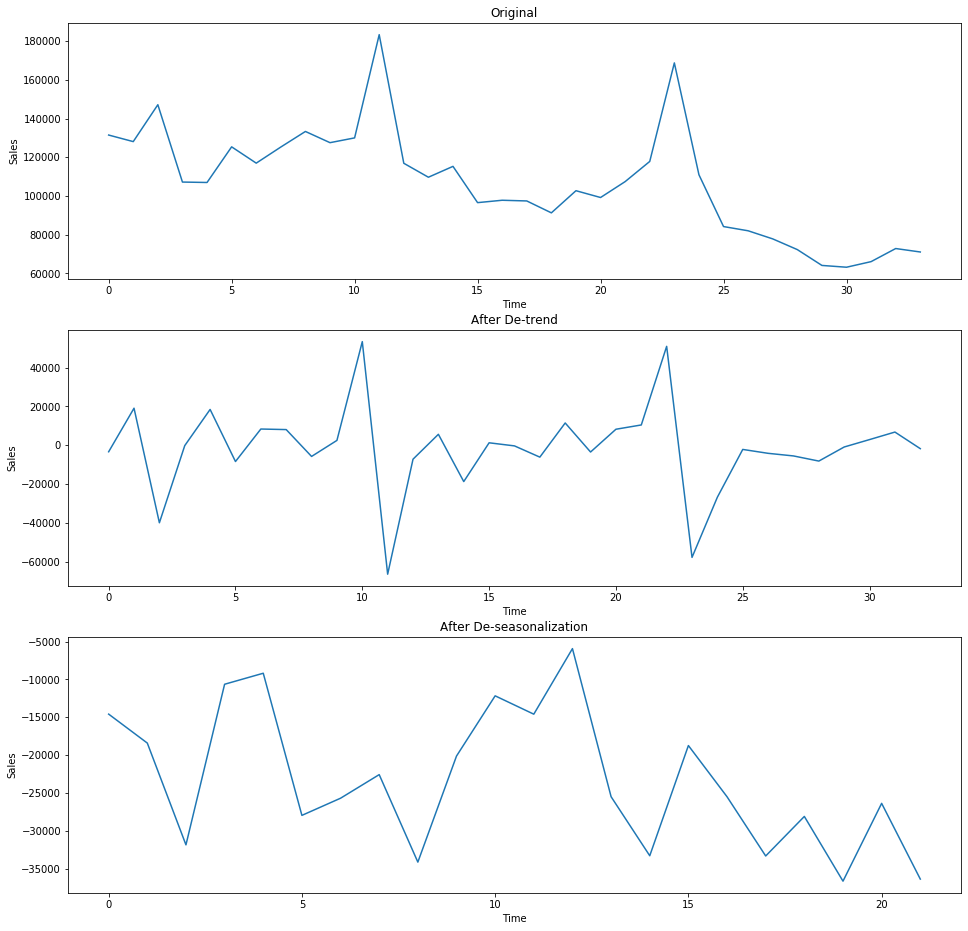

In [13]:

ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [14]:
# now testing the stationarity again after de-seasonality
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -3.270101
p-value                         0.016269
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [15]:
ts_log_diff = new_ts_log - new_ts_log.shift()

In [16]:
ts=sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
print(ts)

        index  item_cnt_day
0  2013-01-01      131479.0
1  2013-02-01      128090.0
2  2013-03-01      147142.0
3  2013-04-01      107190.0
4  2013-05-01      106970.0
5  2013-06-01      125381.0
6  2013-07-01      116966.0
7  2013-08-01      125291.0
8  2013-09-01      133332.0
9  2013-10-01      127541.0
10 2013-11-01      130009.0
11 2013-12-01      183342.0
12 2014-01-01      116899.0
13 2014-02-01      109687.0
14 2014-03-01      115297.0
15 2014-04-01       96556.0
16 2014-05-01       97790.0
17 2014-06-01       97429.0
18 2014-07-01       91280.0
19 2014-08-01      102721.0
20 2014-09-01       99208.0
21 2014-10-01      107422.0
22 2014-11-01      117845.0
23 2014-12-01      168755.0
24 2015-01-01      110971.0
25 2015-02-01       84198.0
26 2015-03-01       82014.0
27 2015-04-01       77827.0
28 2015-05-01       72295.0
29 2015-06-01       64114.0
30 2015-07-01       63187.0
31 2015-08-01       66079.0
32 2015-09-01       72843.0
33 2015-10-01       71056.0


In [17]:
# conda install -c conda-forge fbprophet

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [18]:
#prophet reqiures a pandas df at the below config 
# ( date column named as DS and the value column as Y)
#instantiate Prophet with only yearly seasonality as our data is monthly
#fit the model with your dataframe

In [19]:
from fbprophet import Prophet
ts.columns=['ds','y']
model = Prophet( yearly_seasonality=True)  
model.fit(ts) 

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/virajkothari/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
future = model.make_future_dataframe(periods = 1, freq = 'MS')  
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
30,2015-07-01,64132.481328,61158.086721,67121.900556
31,2015-08-01,68255.356220,65177.218514,71653.128202
32,2015-09-01,70408.960108,67323.090260,73494.173911
33,2015-10-01,71379.147257,68399.284922,74577.300817
34,2015-11-01,83193.957161,80053.563710,86437.859575


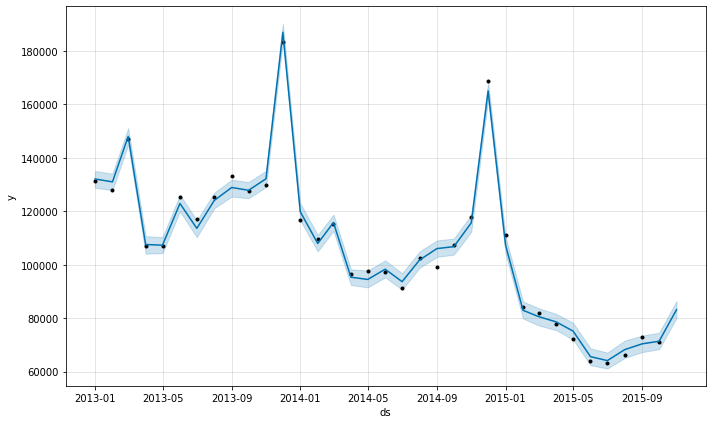

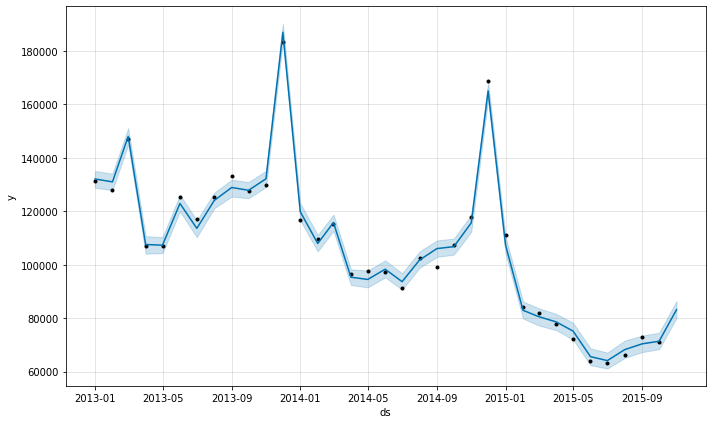

In [21]:
model.plot(forecast)


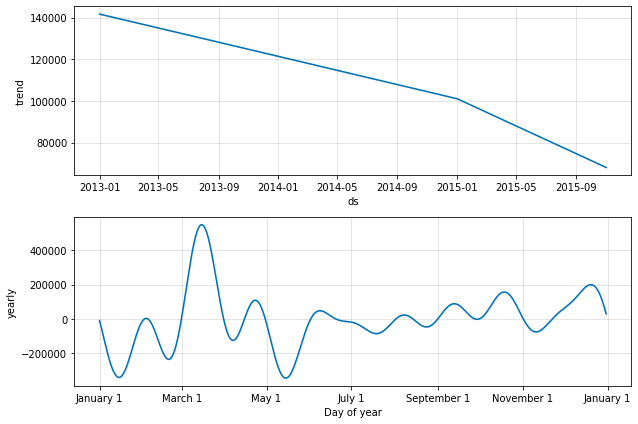

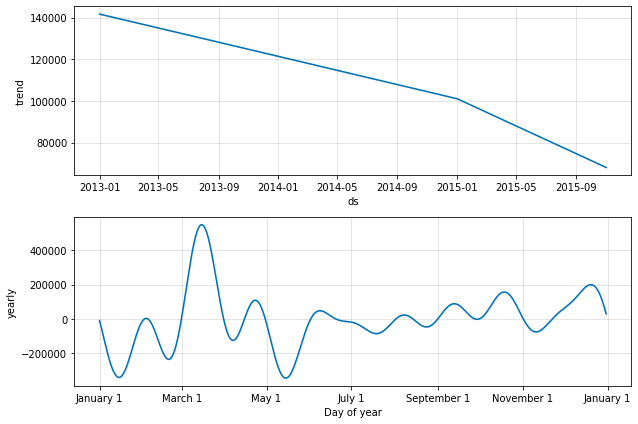

In [22]:
model.plot_components(forecast)